In [1]:
from gensim.models import Word2Vec
from matplotlib import *
import matplotlib.pyplot as plt

In [3]:
# paths to minerals, intervals, and word2vec model
filepath1 = r'/Users/ide/Dropbox/inProgress/Livny-project/experiment/kevin/lists/common_minerals.txt'
filepath2 = r'/Users/ide/Dropbox/inProgress/Livny-project/experiment/kevin/lists/common_intervals.txt'
model = Word2Vec.load(r'/Users/ide/Dropbox/inProgress/Livny-project/experiment/kevin/models/word2vec.model')

# extract the data
data = {}
with open(filepath1) as fp1:  
   mineral = fp1.readline().replace('\n', ' ')
   while mineral:
        if mineral in model.wv.vocab:
            current_min = mineral
            data[mineral] = {}
            mineral_data = {}
            with open(filepath2) as fp2:
                interval = fp2.readline().replace('\n', '')
                while interval:
                    if interval in model.wv.vocab:
                        sim = model.wv.similarity(interval,mineral)
                        data[mineral][interval] = sim
                    interval = fp2.readline().replace('\n', '')
        mineral = fp1.readline().replace('\n', '')

In [4]:
# a temporally-ordered nested dictionary of time spans
# also captures relation between eras, periods, etc.
# for example, the mesozoic era is composed of three periods: cretaceous, jurassic, and triassic

time_tree = {'cenozoic': {'quaternary': {'holocene':'',
                                         'pleistocene':''},
                          'tertiary': {'neogene': {'pliocene':'',
                                                   'miocene':''},
                                       'paleogene': {'oligocene':'',
                                                     'eocene':'',
                                                     'paleocene':''}}},
             'mesozoic': {'cretaceous':'',
                          'jurassic':'',
                          'triassic':''},
             'paleozoic': {'permian':'',
                           'carboniferous':{'pennsylvanian':'',
                                            'mississippian':''},
                           'devonian':'',
                           'silurian':'',
                           'ordovician':'',
                           'cambrian':''},
             'precambrian': {'proterozoic': {'neoproterozoic':''},
                             'archean':''}}

In [5]:
# some preconstructed time intervals used in DisplayGraph below
eras = list(time_tree.keys())
eras.reverse()
periods = list(time_tree['cenozoic'].keys()) + list(time_tree['mesozoic'].keys()) + list(time_tree['paleozoic'].keys()) + list(time_tree['precambrian'].keys())
periods.reverse()

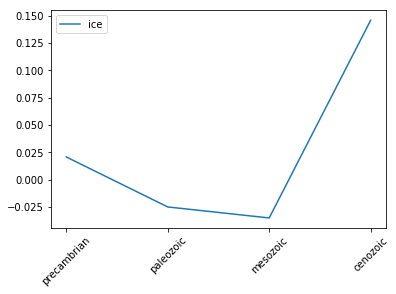

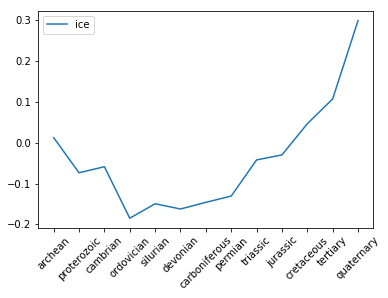

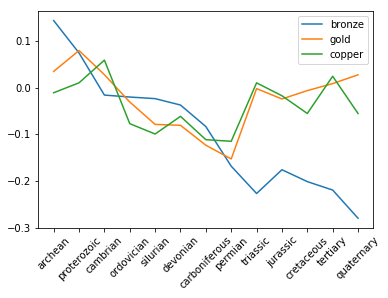

In [9]:
# minerals -> a string list of minerals, i.e. ['ice', 'gold', 'copper']
# timescale -> a string list of time, i.e. eras or periods represented above (displayed in order given)

# TODO: throw exceptions when params not in correct format, mineral DNE, timescale DNE, etc.

def DisplayGraph(minerals, timescale):
     for mineral in minerals:
          mineral_data = data[mineral]
          mineral_values = []
          for time in timescale:
               mineral_values.append(mineral_data[time])
          plt.plot(timescale, mineral_values, label=mineral)
     plt.xticks(rotation=45)
     plt.legend()
     plt.show()
    
# some examples
DisplayGraph(['ice'], eras)
DisplayGraph(['ice'], periods)
DisplayGraph(['bronze', 'gold', 'copper'], periods)

Questions<br>
1. From what I understand, we are trying to capture how these minerals change over time. And in this case, we are representing time by various eras, periods, etc. Like I mentioned above, there is a hierarchical relation between the various scales (eras are composed of periods which are composed of epochs which are composed of ages). So, if I create two graphs of the same mineral but one is over all the eras and the other is over all the periods, intuition says they should look similar, as they both correspond to the same timeframe (this can be seen in the 'ice' graphs above). But when I do the same with 'gold', I get the following:

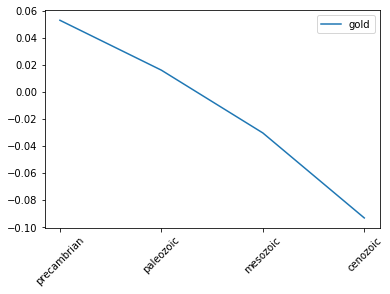

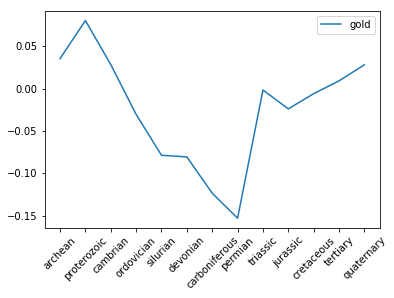

In [7]:
DisplayGraph(['gold'], eras)
DisplayGraph(['gold'], periods)

1. (continued) 
So I'm not too sure what to make of this. Perhaps I'm not representing the data correctly, this is the correct relationship, or we simply need some more data. 
2. 
Do you have any preferences in how the y-axis is labeled / what kind of graph is used to display the data?
3. 
Just confirming that values close to 1 indicate a strong positive relationshop, close to -1 indicate a strong negative relationship, and close to 0 indicate a weak relationship, if any. In other words, its the measure of cosine similarity.